In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/6_CNT_FAM_MEMBERS.csv")
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.877836
COMMONAREA_MODE                 69.877836
COMMONAREA_AVG                  69.877836
NONLIVINGAPARTMENTS_AVG         69.438189
NONLIVINGAPARTMENTS_MEDI        69.438189
NONLIVINGAPARTMENTS_MODE        69.438189
FONDKAPREMONT_MODE              68.390326
LIVINGAPARTMENTS_MEDI           68.359736
LIVINGAPARTMENTS_AVG            68.359736
LIVINGAPARTMENTS_MODE           68.359736
FLOORSMIN_MODE                  67.853703
FLOORSMIN_MEDI                  67.853703
FLOORSMIN_AVG                   67.853703
YEARS_BUILD_MEDI                66.504172
YEARS_BUILD_MODE                66.504172
YEARS_BUILD_AVG                 66.504172
LANDAREA_MODE                   59.382607
LANDAREA_AVG                    59.382607
LANDAREA_MEDI                   59.382607
BASEMENTAREA_AVG                58.523489
BASEMENTAREA_MODE               58.523489
BASEMENTAREA_MEDI               58.523489
NONLIVINGAREA_AVG               55.186272
NONLIVINGAREA_MEDI              55

# DROPPING "FLAG_MOBIL"

In [64]:
df[["DAYS_LAST_PHONE_CHANGE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE"]].corr()["DAYS_LAST_PHONE_CHANGE"]

DAYS_LAST_PHONE_CHANGE    1.000000
FLAG_MOBIL                     NaN
FLAG_EMP_PHONE            0.021097
FLAG_WORK_PHONE           0.041559
FLAG_CONT_MOBILE          0.028900
FLAG_PHONE                0.067541
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [65]:
df["FLAG_MOBIL"].value_counts()

1    307291
0         1
Name: FLAG_MOBIL, dtype: int64

In [66]:
df.drop("FLAG_MOBIL",axis=1,inplace=True)

In [67]:
df[["DAYS_LAST_PHONE_CHANGE","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE"]].corr()["DAYS_LAST_PHONE_CHANGE"]

DAYS_LAST_PHONE_CHANGE    1.000000
FLAG_EMP_PHONE            0.021097
FLAG_WORK_PHONE           0.041559
FLAG_CONT_MOBILE          0.028900
FLAG_PHONE                0.067541
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

# COLUMNS RELATED TO "DAYS_LAST_PHONE_CHANGE"

In [68]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=df.shape[0], n_features=5,random_state=42)
df1 = pd.DataFrame(X, columns=["DAYS_LAST_PHONE_CHANGE","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE"])

In [69]:
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(df1)
print(vif_results)


                  Feature       VIF
0  DAYS_LAST_PHONE_CHANGE  1.000020
1          FLAG_EMP_PHONE  1.000007
2         FLAG_WORK_PHONE  1.000006
3        FLAG_CONT_MOBILE  1.000033
4              FLAG_PHONE  1.000015


multicollinarity is not excisting

In [31]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 158702
Commercial associate     71574
Pensioner                55336
State servant            21680
Name: NAME_INCOME_TYPE, dtype: int64

In [38]:
# checking whether this column is valueable or not

df1 = df.dropna(subset=['DAYS_LAST_PHONE_CHANGE'])
df1[["DAYS_LAST_PHONE_CHANGE","TARGET"]].corr()

# this column is having a weak -VE linear relationship with target column

,DAYS_LAST_PHONE_CHANGE,TARGET
DAYS_LAST_PHONE_CHANGE,1.00000,-0.05523
TARGET,-0.05523,1.00000


In [39]:
from sklearn.preprocessing import LabelEncoder

label_enocder=LabelEncoder()
df1[["DAYS_LAST_PHONE_CHANGE","TARGET"]].corr()

# this column is having a weak +VE linear relationship with target column

,DAYS_LAST_PHONE_CHANGE,TARGET
DAYS_LAST_PHONE_CHANGE,1.00000,-0.05523
TARGET,-0.05523,1.00000


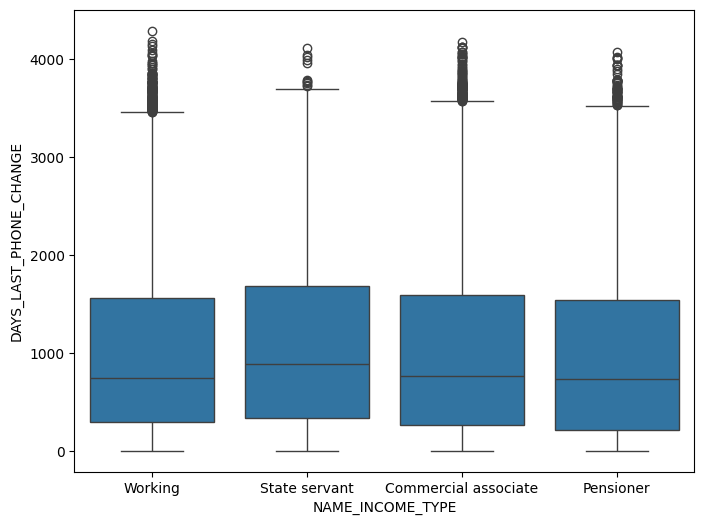

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='NAME_INCOME_TYPE', y='DAYS_LAST_PHONE_CHANGE', data=df)
plt.show()

* All theses cases outliers are present but no extreme outiers

In [51]:
correlation_matrix = df1.corr()

# Get the columns with correlation values between 0.6 and -0.6 with respect to the target column
target_correlations = correlation_matrix['DAYS_LAST_PHONE_CHANGE']
selected_columns=target_correlations[(target_correlations<0.6)|(target_correlations>0.6)].index

<ipython-input-51-9fd7d92dda5d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


In [53]:
df[selected_columns]

,Unnamed: 0.1,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,100002,1,0,202500.0,406597.5,24700.5,351000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,100004,0,0,67500.0,135000.0,6750.0,135000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,100006,0,0,135000.0,312682.5,29686.5,297000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,4,4,100007,0,0,121500.0,513000.0,21865.5,513000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307287,307287,307287,456251,0,0,157500.0,254700.0,27558.0,225000.0,6,...,0,0,0,0,0.5,0.0,0.0,0.0,0.0,2.5
307288,307288,307288,456252,0,0,72000.0,269550.0,12001.5,225000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.5
307289,307289,307289,456253,0,0,153000.0,677664.0,29979.0,585000.0,6,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307290,307290,307290,456254,1,0,171000.0,370107.0,20205.0,319500.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'SK_ID_CURR', 'TARGET',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=120)

In [72]:
# DROPPING THE COLUMN "DAYS_LAST_PHONE_CHANGE"

df.drop("DAYS_LAST_PHONE_CHANGE",axis=1, inplace=True)


,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df.drop("Unnamed: 0",axis=1, inplace=True)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df.to_csv('7_DAYS_LAST_PHONE_CHANGE.csv', index=False)

# INFORMATION ABOUT HOUSE

In [91]:
for_df=(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False).head(50)
for_df

COMMONAREA_MODE                 69.877836
COMMONAREA_AVG                  69.877836
COMMONAREA_MEDI                 69.877836
NONLIVINGAPARTMENTS_MEDI        69.438189
NONLIVINGAPARTMENTS_MODE        69.438189
NONLIVINGAPARTMENTS_AVG         69.438189
FONDKAPREMONT_MODE              68.390326
LIVINGAPARTMENTS_MEDI           68.359736
LIVINGAPARTMENTS_AVG            68.359736
LIVINGAPARTMENTS_MODE           68.359736
FLOORSMIN_MODE                  67.853703
FLOORSMIN_MEDI                  67.853703
FLOORSMIN_AVG                   67.853703
YEARS_BUILD_MODE                66.504172
YEARS_BUILD_MEDI                66.504172
YEARS_BUILD_AVG                 66.504172
LANDAREA_MEDI                   59.382607
LANDAREA_MODE                   59.382607
LANDAREA_AVG                    59.382607
BASEMENTAREA_MODE               58.523489
BASEMENTAREA_MEDI               58.523489
BASEMENTAREA_AVG                58.523489
NONLIVINGAREA_MODE              55.186272
NONLIVINGAREA_AVG               55

In [77]:
df["FLAG_OWN_REALTY"].value_counts()*100/df.shape[0]

Y    69.367247
N    30.632753
Name: FLAG_OWN_REALTY, dtype: float64

In [78]:
df["NAME_HOUSING_TYPE"].value_counts()*100/df.shape[0]

House / apartment      88.735144
With parents            4.826354
Municipal apartment     3.638559
Rented apartment        1.585463
Office apartment        0.850006
Co-op apartment         0.364474
Name: NAME_HOUSING_TYPE, dtype: float64

In [84]:
filtered_df=df[(df["NAME_HOUSING_TYPE"]=="House / apartment")|(df["NAME_HOUSING_TYPE"]=="With parents")]

In [87]:
filtered_df=filtered_df[filtered_df["FLAG_OWN_REALTY"]=="Y"]

In [93]:
for_filtered_df=(filtered_df.isnull().sum()/filtered_df.shape[0]*100).sort_values(ascending = False).head(50)
for_filtered_df

COMMONAREA_MODE                 69.482290
COMMONAREA_AVG                  69.482290
COMMONAREA_MEDI                 69.482290
NONLIVINGAPARTMENTS_MEDI        69.120177
NONLIVINGAPARTMENTS_MODE        69.120177
NONLIVINGAPARTMENTS_AVG         69.120177
FONDKAPREMONT_MODE              68.043610
LIVINGAPARTMENTS_MEDI           68.028461
LIVINGAPARTMENTS_AVG            68.028461
LIVINGAPARTMENTS_MODE           68.028461
FLOORSMIN_MODE                  67.486512
FLOORSMIN_MEDI                  67.486512
FLOORSMIN_AVG                   67.486512
YEARS_BUILD_MODE                66.132863
YEARS_BUILD_MEDI                66.132863
YEARS_BUILD_AVG                 66.132863
LANDAREA_MEDI                   58.876422
LANDAREA_MODE                   58.876422
LANDAREA_AVG                    58.876422
BASEMENTAREA_MODE               57.940596
BASEMENTAREA_MEDI               57.940596
BASEMENTAREA_AVG                57.940596
NONLIVINGAREA_MODE              54.575042
NONLIVINGAREA_AVG               54

* "FLAG_OWN_REALTY" checks whether Does the client has a property or not
* "NAME_HOUSING_TYPE": What is the housing situation of the client (renting, living with parents, ...)

Conclusions

* Surprisingly people who are having the required conditions have missing info regarding the houses

* This may be because these info might not be required when apply for different types of loans

* Such a kind of information are available in case of people who are applying for housing loans

* Here I am dropping these columns

In [100]:
columns_for_house=for_df[for_df>0].index

In [103]:
df_dropped = df.drop(columns_for_house, axis=1)

In [104]:
# saving the dataframe

df_dropped.shape

(307292, 71)

In [106]:
df_dropped.to_csv('/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/7_FINAL_CLEAN.csv', index=False)